Cardiovascular illnesses (CVDs) are the major cause of death worldwide. CVDs include coronary heart disease, cerebrovascular disease, rheumatic heart disease, and other heart and blood vessel problems. According to the World Health Organization, 17.9 million people die each year. Heart attacks and strokes account for more than four out of every five CVD deaths, with one-third of these deaths occurring before the age of 70. A comprehensive database for factors that contribute to a heart attack has been constructed.

The main purpose here is to collect characteristics of Heart Attack or factors that contribute to it.
The size of the dataset is 1319 samples, which have nine fields, where eight fields are for input fields and one field for an output field. Age, gender(0 for Female, 1 for Male) ,heart rate (impulse), systolic BP (pressurehight), diastolic BP (pressurelow), blood sugar(glucose), CK-MB (kcm), and Test-Troponin (troponin) are representing the input fields, while the output field pertains to the presence of heart attack (class), which is divided into two categories (negative and positive); negative refers to the absence of a heart attack, while positive refers to the presence of a heart attack.

Import  Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [2]:
#create function to call table from google sheet
def urlcall_sheet(a):
  sheet_url_trf = a.replace('/edit#gid=', '/export?format=csv&gid=')
  b = pd.read_csv(sheet_url_trf)
  return b

In [3]:
df_ha = urlcall_sheet('https://docs.google.com/spreadsheets/d/14-POyWcF90Rx9RNWzQ2AVbfN9cb_UfJJceDGok3gCis/edit#gid=2050640130')
df_ha.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


Data Cleaning

In [4]:
print(df_ha.info())
print('=====================================================')
print(f'The dataset has {df_ha.shape[1]} columns and {df_ha.shape[0]} rows')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
None
The dataset has 9 columns and 1319 rows


In [5]:
df_ha.duplicated().sum()

0

In [6]:
for column in df_ha.columns:
    print(f"============= {column} =================")
    display(df_ha[column].value_counts())
    print()

============= age =================


age
60     106
70      73
50      68
63      64
65      62
      ... 
88       1
100      1
14       1
91       1
84       1
Name: count, Length: 75, dtype: int64


============= gender =================


gender
1    870
0    449
Name: count, dtype: int64


============= impluse =================


impluse
60     95
61     57
70     48
64     47
82     46
       ..
49      1
46      1
110     1
36      1
45      1
Name: count, Length: 79, dtype: int64


============= pressurehight =================


pressurehight
150    50
130    41
125    41
120    38
140    32
       ..
204     1
78      1
71      1
70      1
89      1
Name: count, Length: 116, dtype: int64


============= pressurelow =================


pressurelow
75     69
68     67
80     57
70     44
60     43
       ..
102     1
106     1
38      1
47      1
154     1
Name: count, Length: 73, dtype: int64


============= glucose =================


glucose
100.0    41
87.0     32
98.0     31
96.0     30
94.0     30
         ..
338.0     1
282.0     1
354.0     1
153.0     1
331.0     1
Name: count, Length: 244, dtype: int64


============= kcm =================


kcm
300.000    19
1.600      11
2.110       9
1.330       9
1.830       9
           ..
0.657       1
3.420       1
3.490       1
5.730       1
4.010       1
Name: count, Length: 700, dtype: int64


============= troponin =================


troponin
0.003    190
0.006     67
0.005     65
0.004     64
0.007     54
        ... 
2.340      1
0.697      1
0.853      1
1.060      1
1.770      1
Name: count, Length: 352, dtype: int64


============= class =================


class
positive    810
negative    509
Name: count, dtype: int64

In [7]:
df_ha['class'].replace({'negative': 0, 'positive' : 1}, inplace=True)

In [8]:
for column in df_ha.columns:
    print(f"============= {column} =================")
    display(df_ha[column].value_counts())
    print()

============= age =================


age
60     106
70      73
50      68
63      64
65      62
      ... 
88       1
100      1
14       1
91       1
84       1
Name: count, Length: 75, dtype: int64


============= gender =================


gender
1    870
0    449
Name: count, dtype: int64


============= impluse =================


impluse
60     95
61     57
70     48
64     47
82     46
       ..
49      1
46      1
110     1
36      1
45      1
Name: count, Length: 79, dtype: int64


============= pressurehight =================


pressurehight
150    50
130    41
125    41
120    38
140    32
       ..
204     1
78      1
71      1
70      1
89      1
Name: count, Length: 116, dtype: int64


============= pressurelow =================


pressurelow
75     69
68     67
80     57
70     44
60     43
       ..
102     1
106     1
38      1
47      1
154     1
Name: count, Length: 73, dtype: int64


============= glucose =================


glucose
100.0    41
87.0     32
98.0     31
96.0     30
94.0     30
         ..
338.0     1
282.0     1
354.0     1
153.0     1
331.0     1
Name: count, Length: 244, dtype: int64


============= kcm =================


kcm
300.000    19
1.600      11
2.110       9
1.330       9
1.830       9
           ..
0.657       1
3.420       1
3.490       1
5.730       1
4.010       1
Name: count, Length: 700, dtype: int64


============= troponin =================


troponin
0.003    190
0.006     67
0.005     65
0.004     64
0.007     54
        ... 
2.340      1
0.697      1
0.853      1
1.060      1
1.770      1
Name: count, Length: 352, dtype: int64


============= class =================


class
1    810
0    509
Name: count, dtype: int64

Exploratory Data Analysis

<ipython-input-9-77e15ccabc29>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ha['age'], kde=True, ax=axes[0,0])
<ipython-input-9-77e15ccabc29>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ha['gender'], kde=True, ax=axes[0,1])
<ipython-input-9-77e15ccabc29>:4: UserWarning: 

`distplo

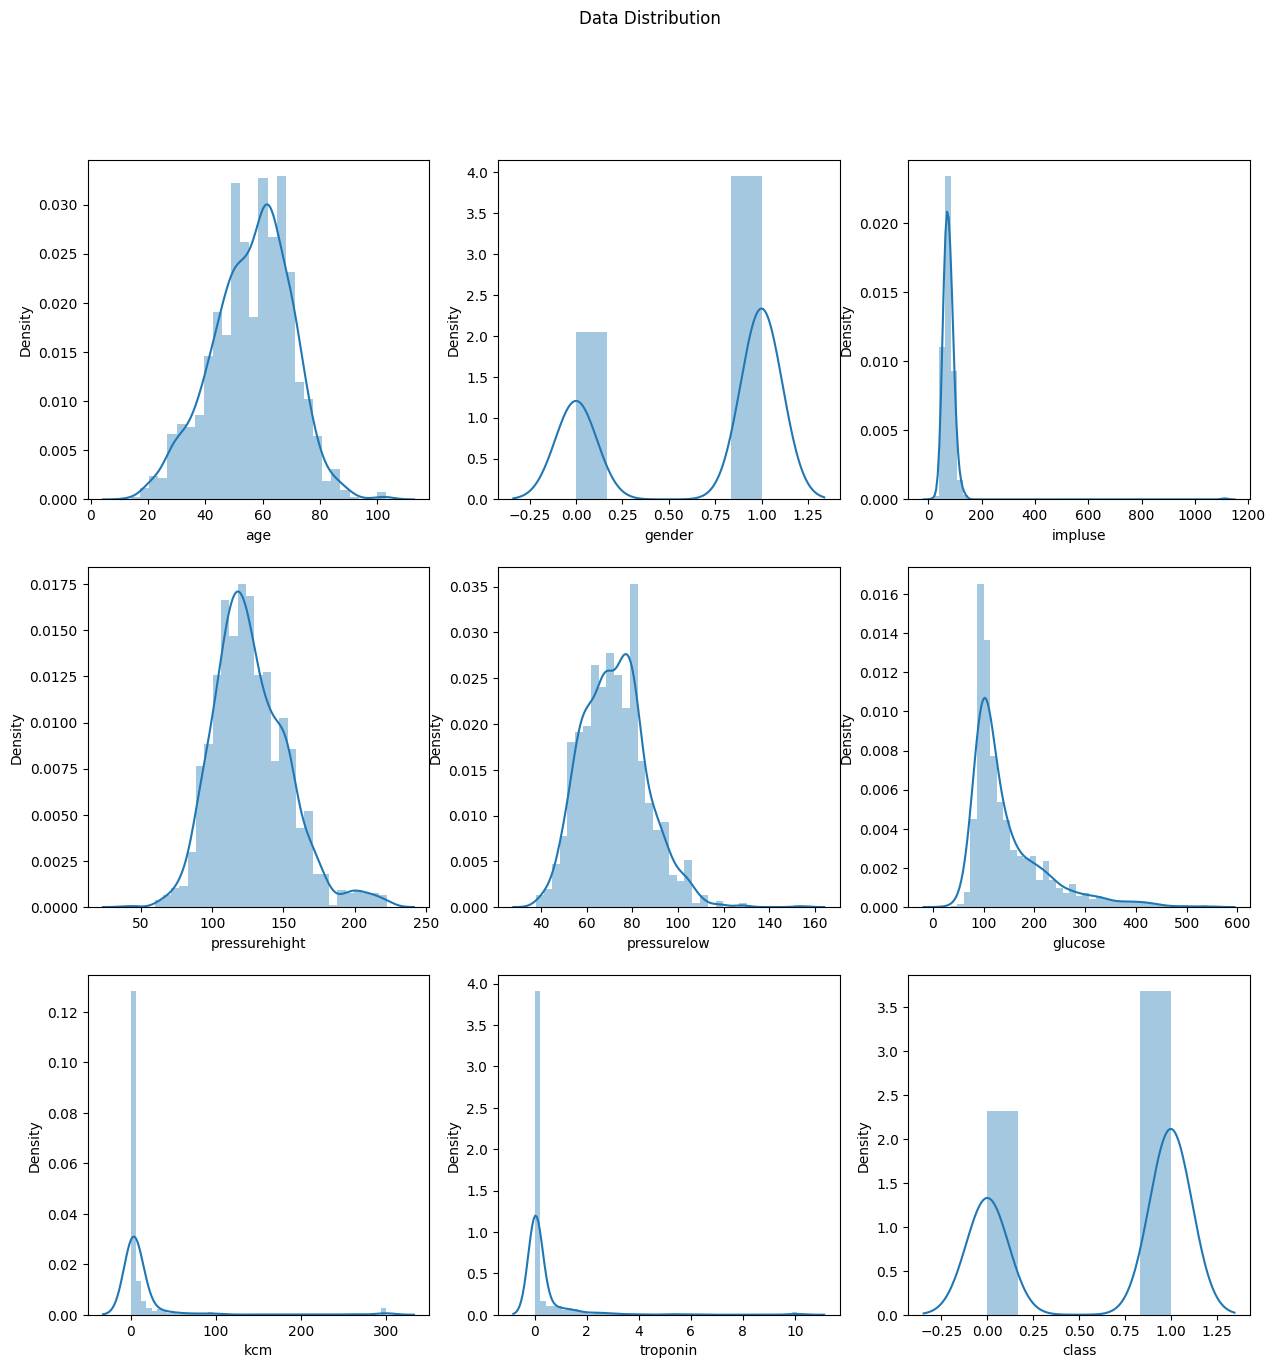

In [9]:
fig, axes = plt.subplots(3, 3,figsize=(15,15))
sns.distplot(df_ha['age'], kde=True, ax=axes[0,0])
sns.distplot(df_ha['gender'], kde=True, ax=axes[0,1])
sns.distplot(df_ha['impluse'], kde=True, ax=axes[0,2])
sns.distplot(df_ha['pressurehight'], kde=True, ax=axes[1,0])
sns.distplot(df_ha['pressurelow'], kde=True, ax=axes[1,1])
sns.distplot(df_ha['glucose'], kde=True, ax=axes[1,2])
sns.distplot(df_ha['kcm'], kde=True, ax=axes[2,0])
sns.distplot(df_ha['troponin'], kde=True, ax=axes[2,1])
sns.distplot(df_ha['class'], kde=True, ax=axes[2,2])
fig.suptitle('Data Distribution')
plt.show()

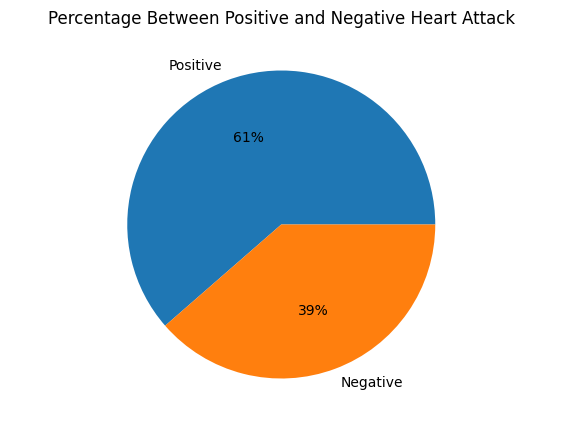

In [10]:
plt.figure(figsize=(7,5))
plt.axis('equal')
labels = ['Positive','Negative']
df_ha_pct = df_ha['class'].value_counts()
plt.pie(df_ha_pct, labels=labels, autopct='%.0f%%')
plt.title('Percentage Between Positive and Negative Heart Attack')
plt.show()

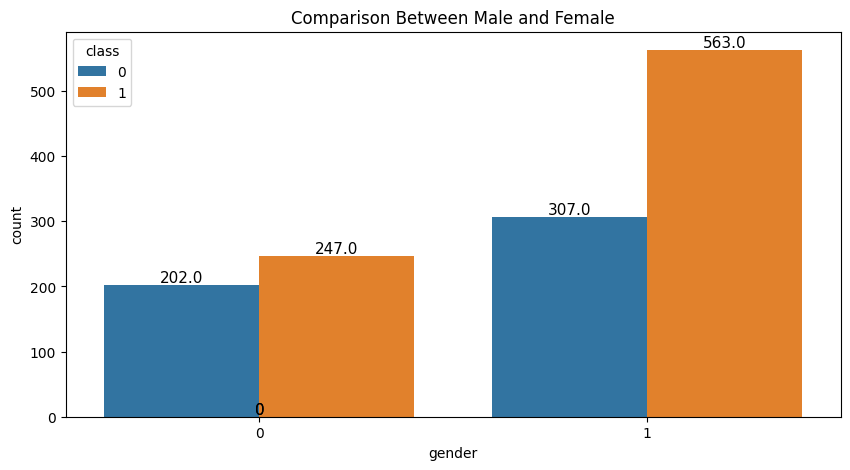

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df_ha, hue='class')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center',
                fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Comparison Between Male and Female')
plt.show()

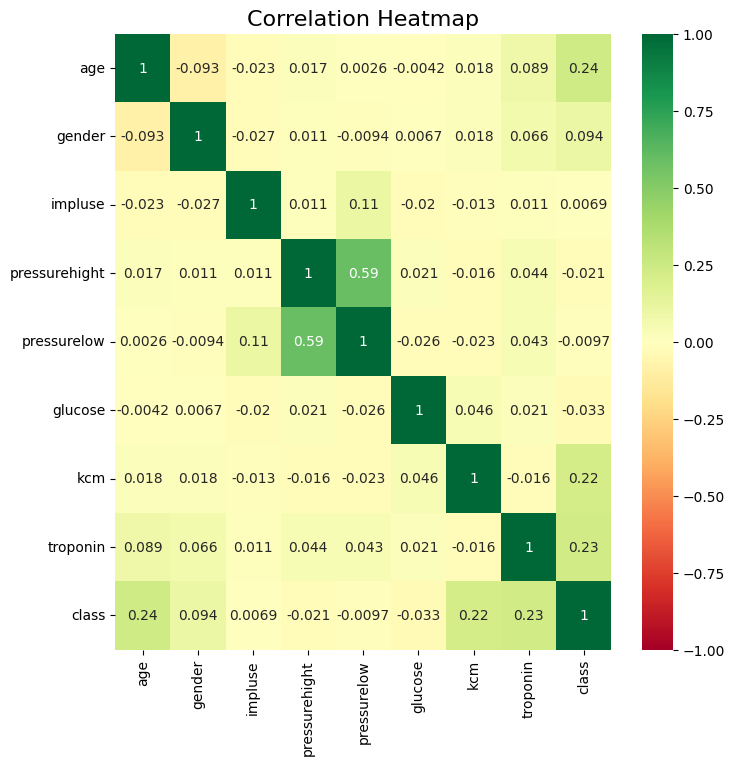

In [12]:
plt.figure(figsize=(8,8))
corr = df_ha.corr()
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [13]:
#Drop uncorrelated column
cleaned_df_ha = df_ha.drop(columns=['gender','impluse', 'pressurehight', 'pressurelow', 'glucose'], axis=1)
cleaned_df_ha.head()

,age,kcm,troponin,class
0,64,1.80,0.012,0
1,21,6.75,1.060,1
2,55,1.99,0.003,0
3,64,13.87,0.122,1
4,55,1.08,0.003,0


## Model Building

In [14]:
# Standardize Age using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cleaned_df_ha[['age','kcm','troponin']] = scaler.fit_transform(df_ha[['age','kcm','troponin']])
cleaned_df_ha.head()

,age,kcm,troponin,class
0,0.572358,-0.290962,-0.302342,0
1,-2.579640,-0.184072,0.605701,1
2,-0.087363,-0.286859,-0.310140,0
3,0.572358,-0.030324,-0.207032,1
4,-0.087363,-0.306509,-0.310140,0


In [15]:
#spliting data
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling

X = cleaned_df_ha.iloc[:,0:3]
y = cleaned_df_ha.iloc[:,3]

#undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (814, 3)
Shape of X_test: (204, 3)
Shape of y_test: (814,)
Shape of y_test: (204,)


1. KNN

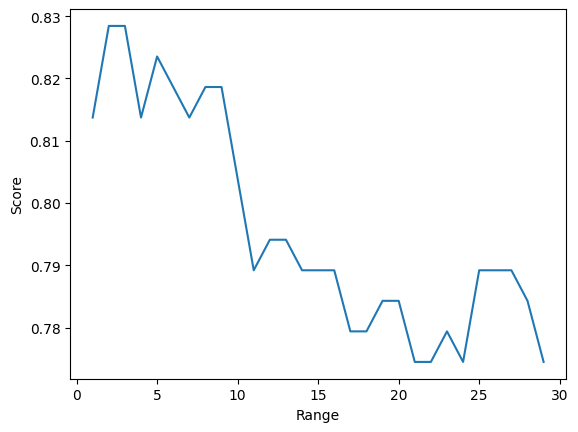

In [16]:
from sklearn.neighbors import KNeighborsClassifier

score_knn = []
for each in range(1,30):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    knn_loop.fit(X_train,y_train)
    score_knn.append(knn_loop.score(X_test,y_test))

plt.plot(range(1,30),score_knn)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [38]:
knn_model = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 4
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
print("KNN accuracy according to K=3 is :",knn_model.score(X_test,y_test))

KNN accuracy according to K=3 is : 0.8284313725490197


2. Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7892156862745098


3. Decision Tree Classification

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.9607843137254902


4. Random Forest

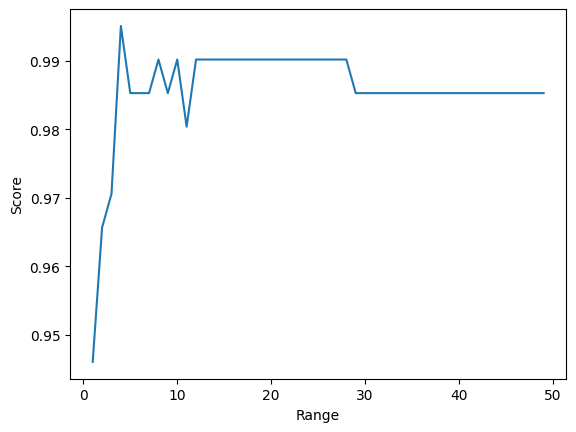

In [20]:
from sklearn.ensemble import RandomForestClassifier

score_rf = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 42)
    rf_loop.fit(X_train,y_train)
    score_rf.append(rf_loop.score(X_test,y_test))

plt.plot(range(1,50),score_rf)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [41]:
rf_model = RandomForestClassifier(n_estimators = 4, random_state = 42) #set tree number
rf_model.fit(X_train,y_train)
accuracy_rf = rf_model.score(X_test,y_test)
print("Random Forest accuracy for 7 trees is :",accuracy_rf)

Random Forest accuracy for 7 trees is : 0.9950980392156863


5. Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
accuracy_nb = nb_model.score(X_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.7156862745098039


# Model Evaluation

In [43]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix,classification_report,accuracy_score, f1_score

In [44]:
def model_evaluation(model,name):
    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'Negative', 'Positive'],va='center')
    plt.xticks([0.5,1.5], [ 'Negative', 'Positive'],va='center')
    plt.show()

In [45]:
data_train_score = {'Accuracy' :[accuracy_score(y_train, lr_model.predict(X_train)),
                          accuracy_score(y_train, nb_model.predict(X_train)),
                          accuracy_score(y_train, dt_model.predict(X_train)),
                          accuracy_score(y_train, rf_model.predict(X_train)),
                          accuracy_score(y_train, knn_model.predict(X_train))],
              'Precision' : [precision_score(y_train, lr_model.predict(X_train)),
                            precision_score(y_train,nb_model.predict(X_train)),
                             precision_score(y_train, dt_model.predict(X_train)),
                             precision_score(y_train, rf_model.predict(X_train)),
                             precision_score(y_train, knn_model.predict(X_train))],
              'Recall' : [recall_score(y_train, lr_model.predict(X_train)),
                            recall_score(y_train,nb_model.predict(X_train)),
                             recall_score(y_train, dt_model.predict(X_train)),
                            recall_score(y_train, rf_model.predict(X_train)),
                             recall_score(y_train, knn_model.predict(X_train))],
              'f1-Score' : [f1_score(y_train, lr_model.predict(X_train), average='weighted'),
                            f1_score(y_train,nb_model.predict(X_train),average='weighted'),
                             f1_score(y_train, dt_model.predict(X_train), average='weighted'),
                            f1_score(y_train, rf_model.predict(X_train), average='weighted'),
                             f1_score(y_train, knn_model.predict(X_train), average='weighted')]}
score_train_table = pd.DataFrame(data_train_score, columns=['Accuracy', 'Precision', 'Recall', 'f1-Score'],
                           index = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN'])

score_train_table

,Accuracy,Precision,Recall,f1-Score
Logistic Regression,0.803440,0.922807,0.655860,0.798923
Naive Bayes,0.722359,0.988827,0.441397,0.698631
Decision Tree,1.000000,1.000000,1.000000,1.000000
Random Forest,0.997543,0.997506,0.997506,0.997543
KNN,0.922604,0.980114,0.860349,0.922253


In [46]:
data_test_score = {'Accuracy' :[accuracy_score(y_test, lr_model.predict(X_test)),
                          accuracy_score(y_test, nb_model.predict(X_test)),
                          accuracy_score(y_test, dt_model.predict(X_test)),
                          accuracy_score(y_test, rf_model.predict(X_test)),
                          accuracy_score(y_test, knn_model.predict(X_test))],
              'Precision' : [precision_score(y_test, lr_model.predict(X_test)),
                            precision_score(y_test,nb_model.predict(X_test)),
                             precision_score(y_test, dt_model.predict(X_test)),
                             precision_score(y_test, rf_model.predict(X_test)),
                             precision_score(y_test, knn_model.predict(X_test))],
              'Recall' : [recall_score(y_test, lr_model.predict(X_test)),
                            recall_score(y_test,nb_model.predict(X_test)),
                             recall_score(y_test, dt_model.predict(X_test)),
                            recall_score(y_test, rf_model.predict(X_test)),
                             recall_score(y_test, knn_model.predict(X_test))],
              'f1-Score' : [f1_score(y_test, lr_model.predict(X_test), average='weighted'),
                            f1_score(y_test,nb_model.predict(X_test),average='weighted'),
                             f1_score(y_test, dt_model.predict(X_test), average='weighted'),
                            f1_score(y_test, rf_model.predict(X_test), average='weighted'),
                             f1_score(y_test, knn_model.predict(X_test), average='weighted')]}
score_test_table = pd.DataFrame(data_test_score, columns=['Accuracy', 'Precision', 'Recall', 'f1-Score'],
                           index = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN'])

score_test_table

,Accuracy,Precision,Recall,f1-Score
Logistic Regression,0.789216,0.933333,0.648148,0.785668
Naive Bayes,0.715686,1.000000,0.462963,0.696483
Decision Tree,0.960784,0.946429,0.981481,0.960724
Random Forest,0.995098,1.000000,0.990741,0.995099
KNN,0.828431,0.939759,0.722222,0.827086


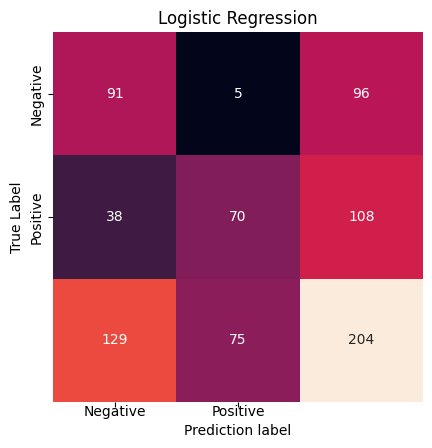

In [47]:
model_evaluation(lr_model.predict(X_test),"Logistic Regression")

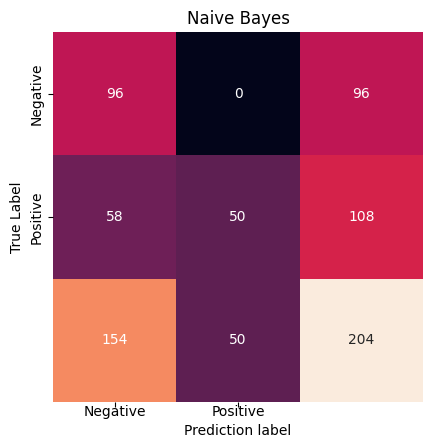

In [48]:
model_evaluation(nb_model.predict(X_test),"Naive Bayes")

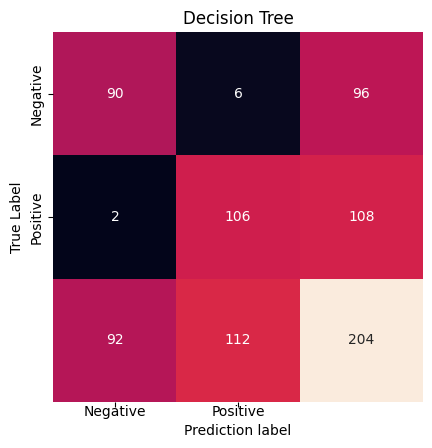

In [49]:
model_evaluation(dt_model.predict(X_test),"Decision Tree")

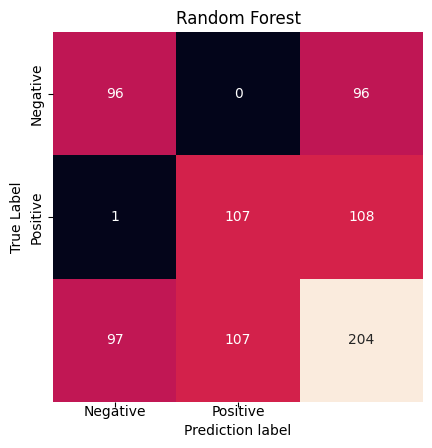

In [50]:
model_evaluation(rf_model.predict(X_test),"Random Forest")

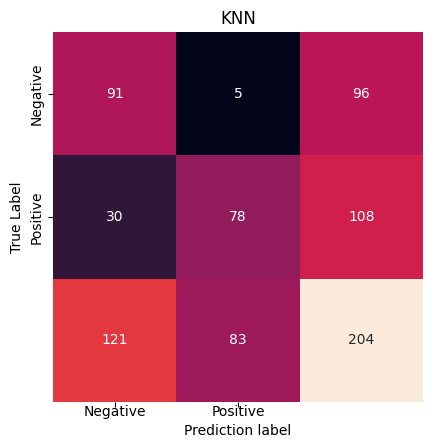

In [51]:
model_evaluation(knn_model.predict(X_test),"KNN")

In [52]:
recall_table_score = pd.DataFrame( {'Recall Score (Train)' : [recall_score(y_train, lr_model.predict(X_train)),
                            recall_score(y_train,nb_model.predict(X_train)),
                             recall_score(y_train, dt_model.predict(X_train)),
                            recall_score(y_train, rf_model.predict(X_train)),
                             recall_score(y_train, knn_model.predict(X_train))],
                             'Recall Score (Test)' : [recall_score(y_test, lr_model.predict(X_test)),
                            recall_score(y_test,nb_model.predict(X_test)),
                             recall_score(y_test, dt_model.predict(X_test)),
                            recall_score(y_test, rf_model.predict(X_test)),
                             recall_score(y_test, knn_model.predict(X_test))]},
                             index = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN'] )

recall_table_score

,Recall Score (Train),Recall Score (Test)
Logistic Regression,0.655860,0.648148
Naive Bayes,0.441397,0.462963
Decision Tree,1.000000,0.981481
Random Forest,0.997506,0.990741
KNN,0.860349,0.722222
